# 数据分析 Notebook

这个Notebook用于查看和分析项目中的各种数据信息，包括：
- 训练数据集信息
- 测试数据集信息
- 数据预处理结果
- 条件网络特征分析
- 模型训练结果
- 路径生成结果


In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✅ 库导入完成")


✅ 库导入完成


In [2]:
# 设置项目路径
project_root = Path('.').resolve()
print(f"项目根目录: {project_root}")

# 定义主要目录
train_data_dir = project_root / 'Dataset' / 'Trainning_Dataset'
test_data_dir = project_root / 'Dataset' / 'Testing_Dataset'
model_results_dir = project_root / 'Results' / 'Model_Results'
path_results_dir = project_root / 'Results' / 'Path_Generator_Results'
report_results_dir = project_root / 'Results' / 'Report_Results'

print(f"训练数据目录: {train_data_dir}")
print(f"测试数据目录: {test_data_dir}")
print(f"模型结果目录: {model_results_dir}")
print(f"路径生成结果目录: {path_results_dir}")
print(f"报告结果目录: {report_results_dir}")


项目根目录: D:\Essay\2.2
训练数据目录: D:\Essay\2.2\Dataset\Trainning_Dataset
测试数据目录: D:\Essay\2.2\Dataset\Testing_Dataset
模型结果目录: D:\Essay\2.2\Results\Model_Results
路径生成结果目录: D:\Essay\2.2\Results\Path_Generator_Results
报告结果目录: D:\Essay\2.2\Results\Report_Results


## 1. 数据集概览


In [3]:
# 查看可用的数据集
print("=== 训练数据集 ===")
if train_data_dir.exists():
    train_datasets = list(train_data_dir.glob('*'))
    for dataset in train_datasets:
        if dataset.is_dir():
            csv_file = dataset / 'train_df.csv'
            if csv_file.exists():
                df = pd.read_csv(csv_file)
                print(f"{dataset.name}: {len(df)} 条记录, {df.shape[1]} 列")
            else:
                print(f"{dataset.name}: 无数据文件")
else:
    print("训练数据目录不存在")

print("\n=== 测试数据集 ===")
if test_data_dir.exists():
    test_datasets = list(test_data_dir.glob('*'))
    for dataset in test_datasets:
        if dataset.is_dir():
            csv_file = dataset / 'val_df.csv'
            if csv_file.exists():
                df = pd.read_csv(csv_file)
                print(f"{dataset.name}: {len(df)} 条记录, {df.shape[1]} 列")
            else:
                print(f"{dataset.name}: 无数据文件")
else:
    print("测试数据目录不存在")


=== 训练数据集 ===
CSI1000: 8023 条记录, 11 列
CSI300: 8023 条记录, 11 列
CSI500: 8023 条记录, 11 列
Dow_Jones: 8351 条记录, 11 列
NASDAQ: 8351 条记录, 11 列
Russell_2000: 8351 条记录, 11 列
SP500: 8351 条记录, 11 列
SSE_Composite: 8023 条记录, 11 列

=== 测试数据集 ===
CSI1000: 827 条记录, 12 列
CSI300: 827 条记录, 12 列
CSI500: 827 条记录, 12 列
Dow_Jones: 879 条记录, 12 列
NASDAQ: 879 条记录, 12 列
Russell_2000: 879 条记录, 12 列
SP500: 879 条记录, 12 列
SSE_Composite: 827 条记录, 12 列


## 2. 详细数据探索


In [4]:
# 选择要分析的数据集
selected_dataset = 'CSI1000'  # 可以修改为其他数据集

# 加载训练数据
train_file = train_data_dir / selected_dataset / 'train_df.csv'
if train_file.exists():
    train_df = pd.read_csv(train_file)
    print(f"=== {selected_dataset} 训练数据 ===")
    print(f"数据形状: {train_df.shape}")
    print(f"\n列名: {list(train_df.columns)}")
    print(f"\n数据类型:")
    print(train_df.dtypes)
    print(f"\n前5行数据:")
    display(train_df.head())
    print(f"\n数据统计:")
    display(train_df.describe())
else:
    print(f"未找到 {selected_dataset} 的训练数据")


=== CSI1000 训练数据 ===
数据形状: (8023, 11)

列名: ['contract_calendar_days', 'expected_trading_days', 'actual_trading_days', 'start_date', 'start_price', 'price_series', 'volatility', 'risk_free_rate', 'data_type', 'ticker', 'country']

数据类型:
contract_calendar_days      int64
expected_trading_days       int64
actual_trading_days         int64
start_date                 object
start_price               float64
price_series               object
volatility                float64
risk_free_rate            float64
data_type                  object
ticker                      int64
country                    object
dtype: object

前5行数据:


,contract_calendar_days,expected_trading_days,actual_trading_days,start_date,start_price,price_series,volatility,risk_free_rate,data_type,ticker,country
0,30,20,22,2015-01-14,6139.29,"[6139.29, 6168.66, 6252.08, 6109.29, 6336.63, 6465.73, 6568.64, 6502.07, 6642.61, 6693.81, 6666.26, 6625.01, 6546.6, 6535.9, 6654.55, 6653.34, 6654.08, 6526.95, 6474.82, 6555.82, 6645.51, 6703.82, 6815.85]",0.212546,0.047990,train,852,China
1,30,20,21,2015-01-15,6168.66,"[6168.66, 6252.08, 6109.29, 6336.63, 6465.73, 6568.64, 6502.07, 6642.61, 6693.81, 6666.26, 6625.01, 6546.6, 6535.9, 6654.55, 6653.34, 6654.08, 6526.95, 6474.82, 6555.82, 6645.51, 6703.82, 6815.85]",0.212604,0.047970,train,852,China
2,30,20,20,2015-01-16,6252.08,"[6252.08, 6109.29, 6336.63, 6465.73, 6568.64, 6502.07, 6642.61, 6693.81, 6666.26, 6625.01, 6546.6, 6535.9, 6654.55, 6653.34, 6654.08, 6526.95, 6474.82, 6555.82, 6645.51, 6703.82, 6815.85]",0.210737,0.047930,train,852,China
3,30,20,21,2015-01-19,6109.29,"[6109.29, 6336.63, 6465.73, 6568.64, 6502.07, 6642.61, 6693.81, 6666.26, 6625.01, 6546.6, 6535.9, 6654.55, 6653.34, 6654.08, 6526.95, 6474.82, 6555.82, 6645.51, 6703.82, 6815.85, 6965.3, 7020.05]",0.210879,0.047900,train,852,China
4,30,20,20,2015-01-20,6336.63,"[6336.63, 6465.73, 6568.64, 6502.07, 6642.61, 6693.81, 6666.26, 6625.01, 6546.6, 6535.9, 6654.55, 6653.34, 6654.08, 6526.95, 6474.82, 6555.82, 6645.51, 6703.82, 6815.85, 6965.3, 7020.05]",0.212102,0.048465,train,852,China



数据统计:


,contract_calendar_days,expected_trading_days,actual_trading_days,start_price,volatility,risk_free_rate,ticker
count,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.0
mean,158.264365,104.926711,105.286925,7095.830168,0.268945,0.030351,852.0
std,123.882895,82.563907,82.601495,1555.505448,0.094368,0.007435,0.0
min,30.000000,20.000000,13.000000,4149.440000,0.154539,0.013000,852.0
25%,30.000000,20.000000,22.000000,6134.390000,0.204380,0.025900,852.0
50%,90.000000,59.000000,63.000000,6916.670000,0.249835,0.029945,852.0
75%,180.000000,119.000000,123.000000,7889.730000,0.277942,0.032600,852.0
max,365.000000,243.000000,250.000000,15006.340000,0.528692,0.050832,852.0


## 3. 数据可视化


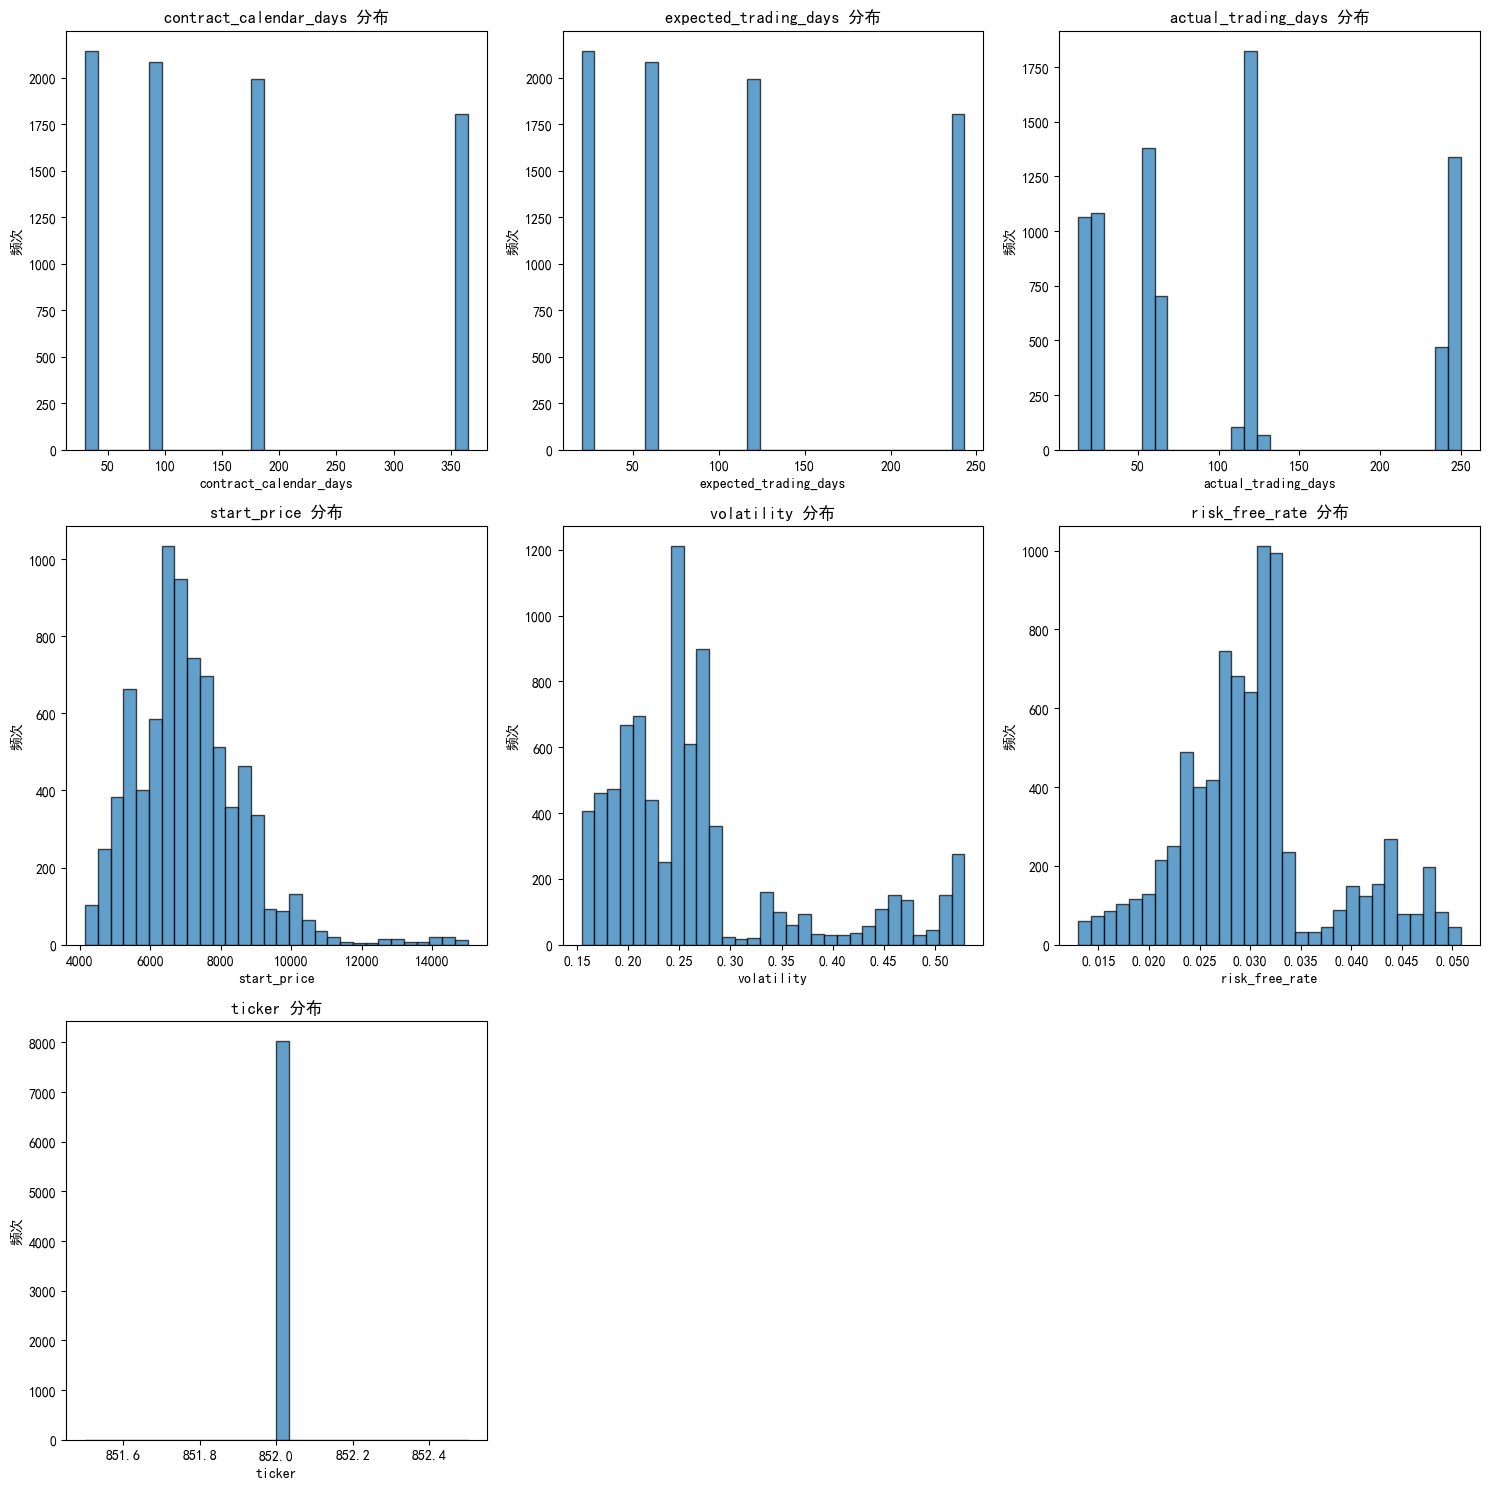

In [6]:
# 可视化数值特征分布
if 'train_df' in locals():
    # 选择数值列进行可视化
    numeric_cols = train_df.select_dtypes(include=[np.number]).columns
    
    # 创建子图
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(numeric_cols):
        row = i // n_cols
        col_idx = i % n_cols
        
        axes[row, col_idx].hist(train_df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_title(f'{col} 分布')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('频次')
    
    # 隐藏多余的子图
    for i in range(len(numeric_cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("请先加载训练数据")


## 4. 模型结果分析


In [7]:
# 查看模型训练结果
print("=== 模型训练结果 ===")
if model_results_dir.exists():
    # 查看所有模型结果
    for asset_dir in model_results_dir.iterdir():
        if asset_dir.is_dir():
            print(f"\n{asset_dir.name}:")
            for file in asset_dir.iterdir():
                if file.is_file():
                    file_size = file.stat().st_size / (1024*1024)  # MB
                    print(f"  {file.name}: {file_size:.2f} MB")
                    
                    # 如果是JSON文件，尝试读取内容
                    if file.suffix == '.json':
                        try:
                            with open(file, 'r') as f:
                                data = json.load(f)
                            print(f"    内容: {data}")
                        except:
                            print(f"    无法读取JSON内容")
else:
    print("模型结果目录不存在")


=== 模型训练结果 ===

all:
  condition_network_all.pth: 0.61 MB
  data_processor_all.pkl: 0.00 MB
  unet_conditional_model_all.pth: 65.05 MB

Garch_Fit_Results:


## 5. 路径生成结果分析


In [8]:
# 查看路径生成结果
print("=== 路径生成结果 ===")
if path_results_dir.exists():
    for asset_dir in path_results_dir.iterdir():
        if asset_dir.is_dir():
            print(f"\n{asset_dir.name}:")
            for file in asset_dir.iterdir():
                if file.is_file():
                    file_size = file.stat().st_size / (1024*1024)  # MB
                    print(f"  {file.name}: {file_size:.2f} MB")
                    
                    # 如果是numpy文件，尝试加载并显示形状
                    if file.suffix == '.npy':
                        try:
                            data = np.load(file)
                            print(f"    形状: {data.shape}")
                            print(f"    数据类型: {data.dtype}")
                            print(f"    数值范围: [{data.min():.4f}, {data.max():.4f}]")
                        except Exception as e:
                            print(f"    无法加载: {e}")
else:
    print("路径生成结果目录不存在")


=== 路径生成结果 ===

CSI1000:
  garch_paths_fitted_1024_samples.npy: 1628.16 MB
    形状: (846848, 1, 252)
    数据类型: float64
    数值范围: [nan, nan]
  gbm_generated_paths_1024_samples.npy: 1628.16 MB
    形状: (846848, 1, 252)
    数据类型: float64
    数值范围: [nan, nan]
  unet_generated_paths_1024_samples.npy: 814.08 MB
    形状: (827, 1024, 1, 252)
    数据类型: float32
    数值范围: [-1.0000, 1.0000]


加载 garch_paths_fitted_1024_samples.npy: 形状 (846848, 1, 252)
加载 gbm_generated_paths_1024_samples.npy: 形状 (846848, 1, 252)
加载 unet_generated_paths_1024_samples.npy: 形状 (827, 1024, 1, 252)
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4
不支持的数据维度: 4


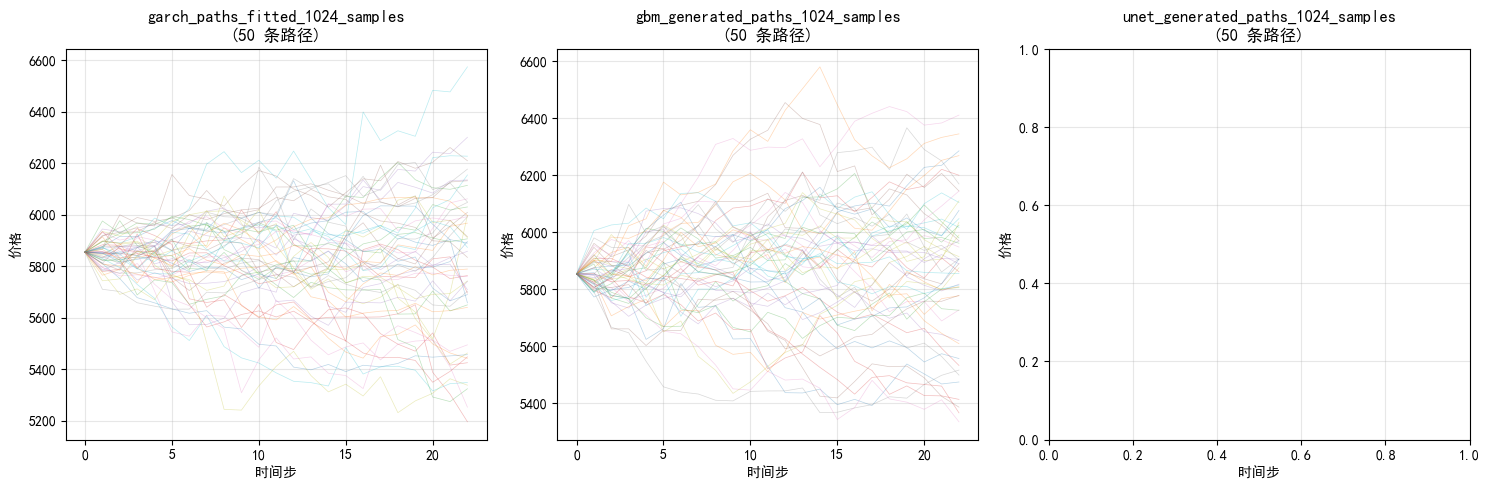

In [9]:
# 可视化生成的路径
def plot_generated_paths(asset_name='CSI1000', max_paths=50):
    """可视化生成的路径"""
    asset_dir = path_results_dir / asset_name
    
    if not asset_dir.exists():
        print(f"未找到 {asset_name} 的路径生成结果")
        return
    
    # 查找所有numpy文件
    npy_files = list(asset_dir.glob('*.npy'))
    
    if not npy_files:
        print(f"未找到 {asset_name} 的numpy文件")
        return
    
    # 创建子图
    n_files = len(npy_files)
    fig, axes = plt.subplots(1, n_files, figsize=(5*n_files, 5))
    if n_files == 1:
        axes = [axes]
    
    for i, file in enumerate(npy_files):
        try:
            data = np.load(file)
            print(f"加载 {file.name}: 形状 {data.shape}")
            
            # 选择要绘制的路径数量
            n_paths_to_plot = min(max_paths, data.shape[0])
            
            # 绘制路径
            for j in range(n_paths_to_plot):
                if data.ndim == 3:  # (batch, channels, time)
                    path = data[j, 0, :]  # 取第一个通道
                elif data.ndim == 2:  # (batch, time)
                    path = data[j, :]
                else:
                    print(f"不支持的数据维度: {data.ndim}")
                    continue
                
                axes[i].plot(path, alpha=0.3, linewidth=0.5)
            
            axes[i].set_title(f'{file.stem}\n({n_paths_to_plot} 条路径)')
            axes[i].set_xlabel('时间步')
            axes[i].set_ylabel('价格')
            axes[i].grid(True, alpha=0.3)
            
        except Exception as e:
            print(f"绘制 {file.name} 时出错: {e}")
    
    plt.tight_layout()
    plt.show()

# 调用函数
plot_generated_paths('CSI1000')


## 6. 条件网络特征分析


=== all 条件网络特征重要性 ===
原始权重:
  数值特征: 0.8010
  国家特征: 0.9992
  指数特征: 1.9994

相对重要性:
  数值特征: 21.1%
  国家特征: 26.3%
  指数特征: 52.6%


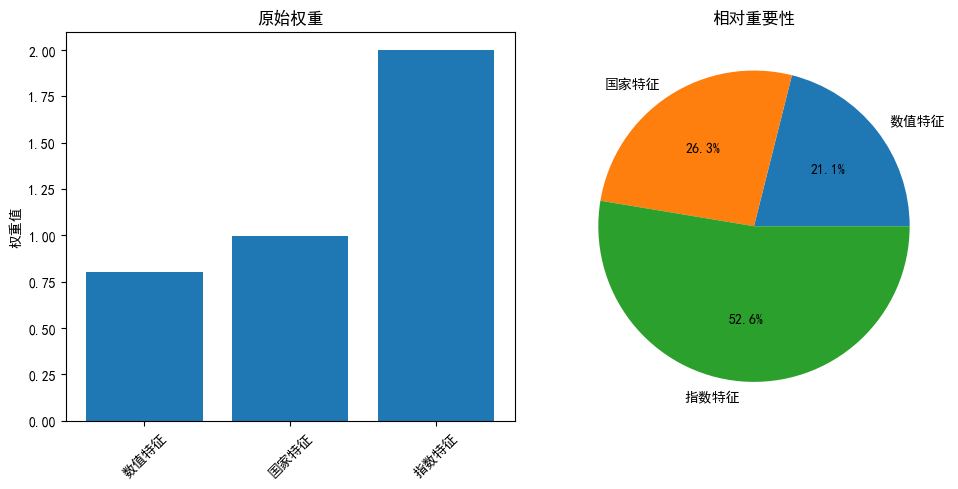

In [10]:
# 分析条件网络的特征重要性
def analyze_condition_network(asset_name='all'):
    """分析条件网络的特征重要性"""
    try:
        # 尝试加载条件网络
        model_file = model_results_dir / asset_name / f'condition_network_{asset_name}.pth'
        
        if not model_file.exists():
            print(f"未找到条件网络文件: {model_file}")
            return
        
        # 加载模型
        state_dict = torch.load(model_file, map_location='cpu')
        
        # 提取权重
        numerical_weight = state_dict.get('numerical_weight', torch.tensor(0.8))
        country_weight = state_dict.get('country_weight', torch.tensor(1.0))
        index_weight = state_dict.get('index_weight', torch.tensor(2.0))
        
        # 计算相对重要性
        weights = {
            '数值特征': numerical_weight.item(),
            '国家特征': country_weight.item(),
            '指数特征': index_weight.item()
        }
        
        total_weight = sum(abs(w) for w in weights.values())
        relative_importance = {k: abs(v)/total_weight for k, v in weights.items()}
        
        print(f"=== {asset_name} 条件网络特征重要性 ===")
        print(f"原始权重:")
        for k, v in weights.items():
            print(f"  {k}: {v:.4f}")
        
        print(f"\n相对重要性:")
        for k, v in relative_importance.items():
            print(f"  {k}: {v:.1%}")
        
        # 可视化
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.bar(weights.keys(), weights.values())
        plt.title('原始权重')
        plt.ylabel('权重值')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        plt.pie(relative_importance.values(), labels=relative_importance.keys(), autopct='%1.1f%%')
        plt.title('相对重要性')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"分析条件网络时出错: {e}")

# 调用函数
analyze_condition_network('all')


In [ ]:
# 在这里添加你的自定义分析代码
# 例如：
# - 特定数据集的深入分析
# - 自定义可视化
# - 数据预处理
# - 模型性能分析
# - 等等...

print("自定义分析区域 - 请在此添加你的分析代码")
